In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('NTAD_Fatality_Analysis_Reporting_System_2023_Accidents.csv')
df

,OBJECTID,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,...,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS,x,y
0,1,1,Alabama,10001,0,0,1,1,0,1,...,10:00pm-10:59pm,45,45,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,-9.633459e+06,3.753860e+06
1,2,1,Alabama,10002,0,0,1,1,0,1,...,2:00am-2:59am,23,23,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,-9.826529e+06,3.569113e+06
2,3,1,Alabama,10003,0,0,1,1,0,1,...,11:00pm-11:59pm,8,8,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,-9.615313e+06,4.128378e+06
3,4,1,Alabama,10004,0,0,1,1,0,3,...,7:00pm-7:59pm,44,44,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,-9.656598e+06,3.634669e+06
4,5,1,Alabama,10005,0,0,1,1,0,4,...,3:00pm-3:59pm,8,8,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,-9.756463e+06,3.636309e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37946,37947,43,Puerto Rico,430296,0,0,2,1,1,1,...,Unknown EMS Scene Arrival Hour,98,Unknown if Arrived,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,-7.391336e+06,2.065907e+06
37947,37948,43,Puerto Rico,430297,0,0,1,1,0,1,...,Unknown EMS Scene Arrival Hour,98,Unknown if Arrived,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,-7.477555e+06,2.071514e+06
37948,37949,43,Puerto Rico,430298,0,0,1,1,0,1,...,Unknown EMS Scene Arrival Hour,98,Unknown if Arrived,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,-7.354785e+06,2.077903e+06
37949,37950,43,Puerto Rico,430299,0,0,1,1,0,1,...,11:00am-11:59am,50,50,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,-7.335935e+06,2.081357e+06


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37951 entries, 0 to 37950
Data columns (total 83 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      37951 non-null  int64  
 1   STATE         37951 non-null  int64  
 2   STATENAME     37951 non-null  object 
 3   ST_CASE       37951 non-null  int64  
 4   PEDS          37951 non-null  int64  
 5   PERNOTMVIT    37951 non-null  int64  
 6   VE_TOTAL      37951 non-null  int64  
 7   VE_FORMS      37951 non-null  int64  
 8   PVH_INVL      37951 non-null  int64  
 9   PERSONS       37951 non-null  int64  
 10  PERMVIT       37951 non-null  int64  
 11  COUNTY        37951 non-null  int64  
 12  COUNTYNAME    37951 non-null  object 
 13  CITY          37951 non-null  int64  
 14  CITYNAME      37951 non-null  object 
 15  MONTH         37951 non-null  int64  
 16  MONTHNAME     37951 non-null  object 
 17  DAY           37951 non-null  int64  
 18  DAYNAME       37951 non-nu

In [41]:
exclude_cols = ['ST_CASE', 'OBJECTID',"x", "y", "LATITUDE", "LONGITUD", "LATITUDE","LATITUDENAME","LONGITUDNAME"]
df = df.drop(columns=exclude_cols)

In [42]:
cat_cols = ["STATE","COUNTY","CITY","MONTH","ROUTE","YEAR",
        "FUNC_SYS", "RD_OWNER","NHS","SP_JUR",
        "REL_ROAD","TYP_INT","RELJCT1","RELJCT2","RUR_URB",
        "HARM_EV","MAN_COLL","LGT_COND","WEATHER","WRK_ZONE",
        "SCH_BUS","RAIL",
        # "ST_CASE","OBJECTID"
        ]
#convert categorical columns to 'category' dtype
for col in cat_cols:
    df[col] = df[col].astype('category')

In [15]:
def analyze_columns_with_uniques(df):
    analysis = []
    for column in df.columns:
        col_data = df[column]
        col_type = col_data.dtype
        missing_percentage = col_data.isnull().mean() * 100
        null_count = col_data.isnull().sum()
        unique_values = col_data.nunique()
        
        if pd.api.types.is_numeric_dtype(col_data):
            col_min = col_data.min()
            col_max = col_data.max()
            col_mean = col_data.mean()
            col_median = col_data.median()
            col_std = col_data.std()
        else:
            col_min = col_max = col_mean = col_median = col_std = None
        
        analysis.append({
            'Column': column,
            'Type': col_type,
            'Missing Value (%)': missing_percentage,
            'Null Value Count': null_count,
            'Unique Values': unique_values,
            'Min': col_min,
            'Max': col_max,
            'Mean': col_mean,
            'Median': col_median,
            'Std': col_std
        })
    
    return pd.DataFrame(analysis)

In [16]:
df_analysis = analyze_columns_with_uniques(df)
df_analysis = df_analysis.sort_values(by='Missing Value (%)', ascending=False)
df_analysis.to_csv('df_analysis.csv', index=False)
df_analysis

,Column,Type,Missing Value (%),Null Value Count,Unique Values,Min,Max,Mean,Median,Std
57,WRK_ZONENAME,object,97.844589,37133,4,NaN,NaN,NaN,NaN,NaN
25,TWAY_ID2,object,74.266818,28185,8753,NaN,NaN,NaN,NaN,NaN
39,MILEPTNAME,object,14.692630,5576,2283,NaN,NaN,NaN,NaN,NaN
80,y,float64,0.413691,157,37633,2.032847e+06,9.569209e+06,4.374454e+06,4.312551e+06,7.502632e+05
79,x,float64,0.413691,157,37699,-1.774160e+07,-7.308103e+06,-1.030810e+07,-9.799860e+06,1.682730e+06
...,...,...,...,...,...,...,...,...,...,...
74,HOSP_HR,int64,0.000000,0,26,0.000000e+00,9.900000e+01,7.663616e+01,8.800000e+01,3.334911e+01
76,HOSP_MN,int64,0.000000,0,65,0.000000e+00,9.900000e+01,8.013267e+01,8.800000e+01,2.796768e+01
75,HOSP_HRNAME,object,0.000000,0,26,NaN,NaN,NaN,NaN,NaN
78,FATALS,int64,0.000000,0,8,1.000000e+00,8.000000e+00,1.085821e+00,1.000000e+00,3.527225e-01


In [43]:
def analyze_columns_with_uniques(df):
    numeric_analysis = []
    categorical_analysis = []
    
    for column in df.columns:
        col_data = df[column]
        col_type = col_data.dtype
        missing_percentage = col_data.isnull().mean() * 100
        null_count = col_data.isnull().sum()
        unique_values = col_data.nunique()
        
        # Prepare basic info common to all columns
        base_info = {
            'Column': column,
            'Type': col_type,
            'Missing Value (%)': missing_percentage,
            'Null Value Count': null_count,
            'Unique Values': unique_values
        }
        
        if pd.api.types.is_numeric_dtype(col_data):
            numeric_info = base_info.copy()
            numeric_info.update({
                'Min': col_data.min(),
                'Max': col_data.max(),
                'Mean': col_data.mean(),
                'Median': col_data.median(),
                'Std': col_data.std()
            })
            numeric_analysis.append(numeric_info)
        else:
            # For categorical columns, calculate frequency stats: get the value with the highest frequency, the value with the lowest frequency, and the average frequency.
            val_counts = col_data.value_counts(dropna=False)
            if not val_counts.empty:
                most_freq_value = val_counts.idxmax()   # value with most occurrences
                most_freq = val_counts.max()              # highest frequency count
                least_freq_value = val_counts.idxmin()    # value with least occurrences
                least_freq = val_counts.min()             # lowest frequency count
                mean_freq = val_counts.mean()             # average frequency count
            else:
                most_freq = least_freq = mean_freq = None
                
            categorical_info = base_info.copy()
            categorical_info.update({
                'Most Frequency': most_freq_value,
                'Least Frequency': least_freq_value,
                # 'Mean Frequency': mean_freq
            })
            categorical_analysis.append(categorical_info)
    
    num_df = pd.DataFrame(numeric_analysis)
    cat_df = pd.DataFrame(categorical_analysis)
    
    # Write the results to an Excel file with two sheets:
    # Sheet "num" for numerical analysis and sheet "cate" for categorical analysis.
    try:
        with pd.ExcelWriter('analysis_output.xlsx') as writer:
            num_df.to_excel(writer, sheet_name='num', index=False)
            cat_df.to_excel(writer, sheet_name='cate', index=False)
    
        print("Excel file 'analysis_output.xlsx' has been created with two sheets: num and cate.")
    
    except PermissionError as e:
        print(f"Permission error: {e}. Please close the file if it is open in another program.")
    return num_df, cat_df

# Example usage:
num_df, cat_df = analyze_columns_with_uniques(df)

Permission error: [Errno 13] Permission denied: 'analysis_output.xlsx'. Please close the file if it is open in another program.


C:\Users\subha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:453: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



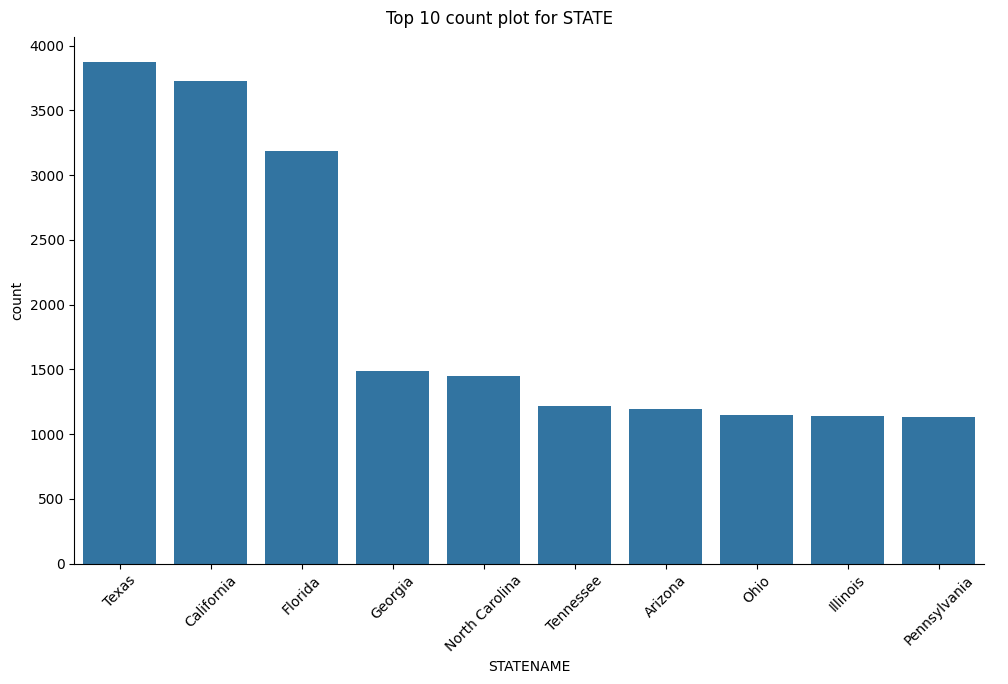

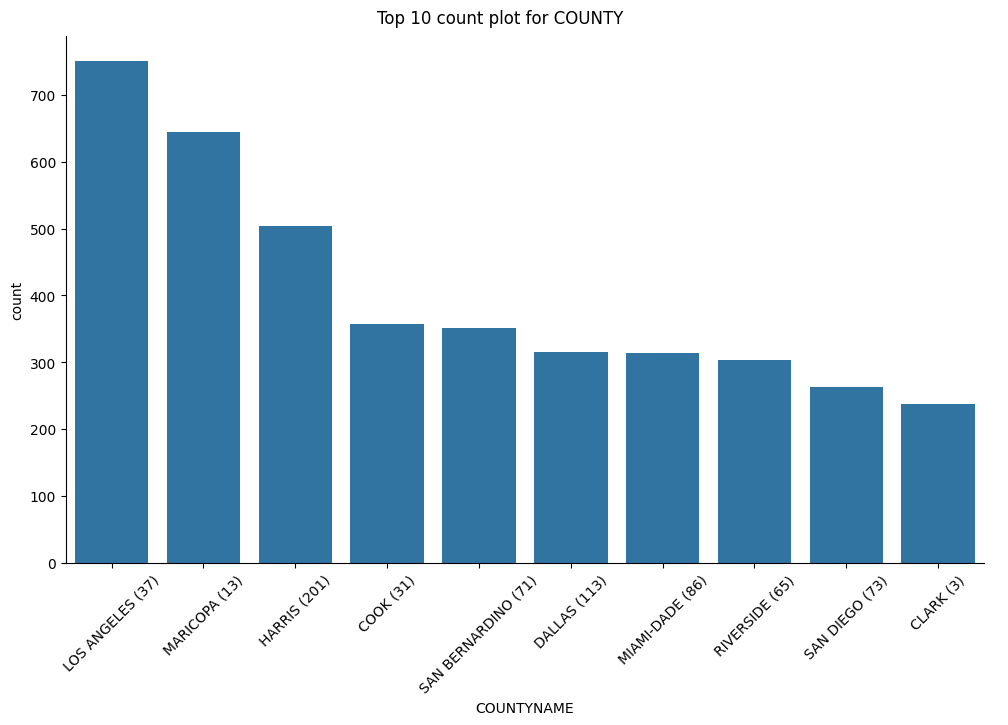

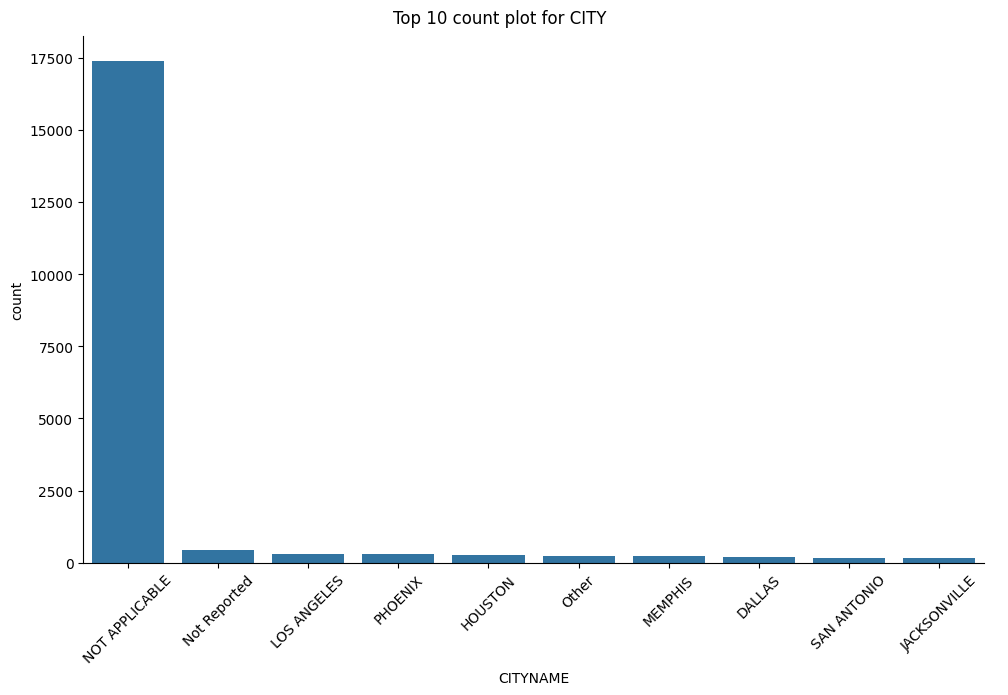

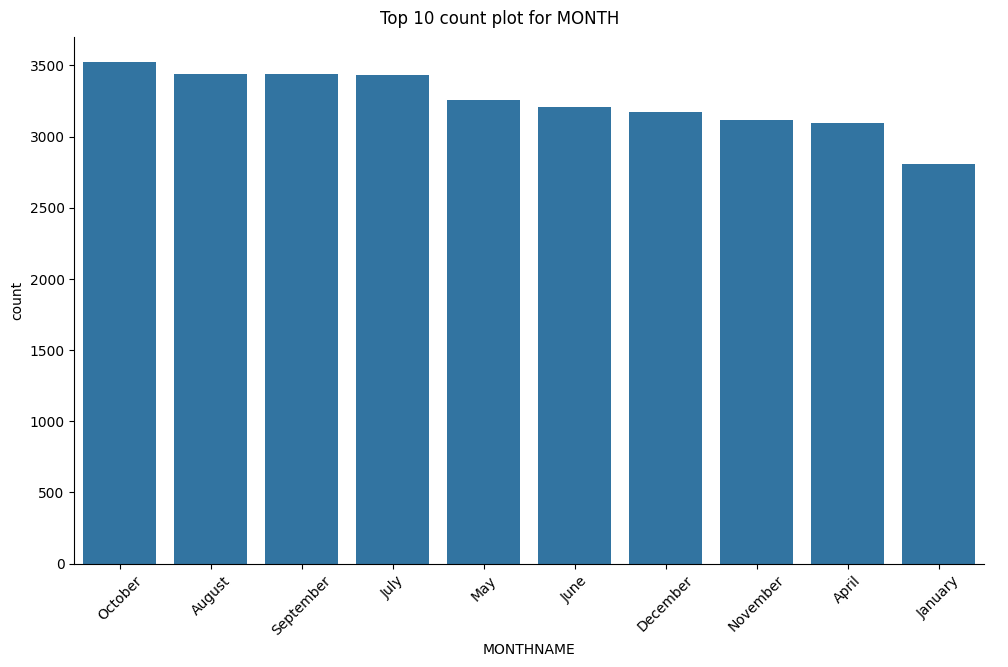

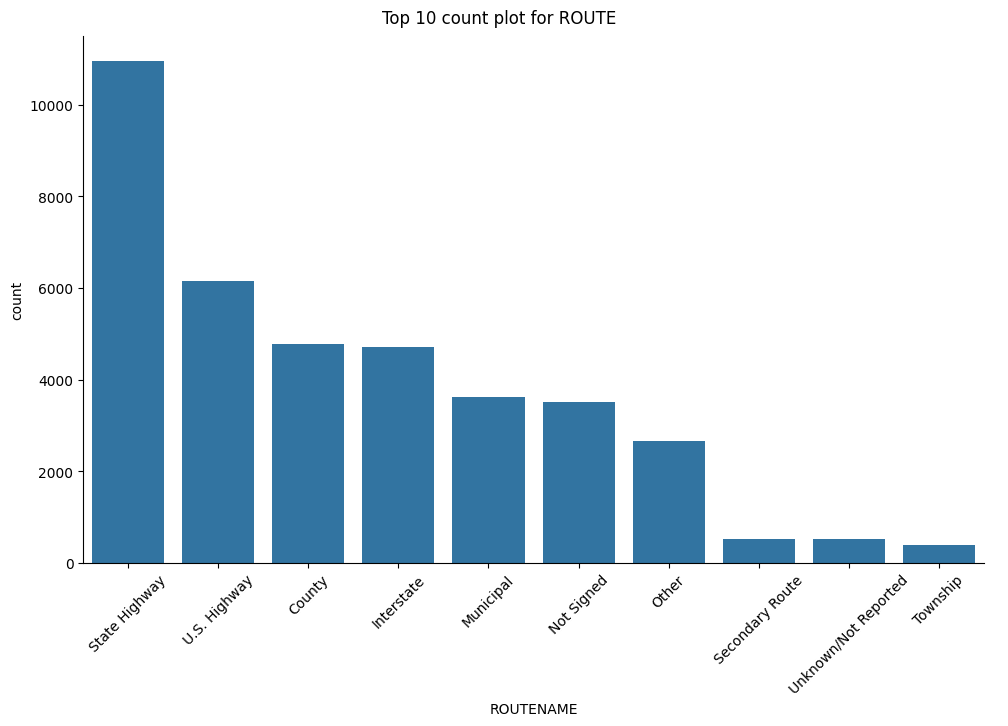

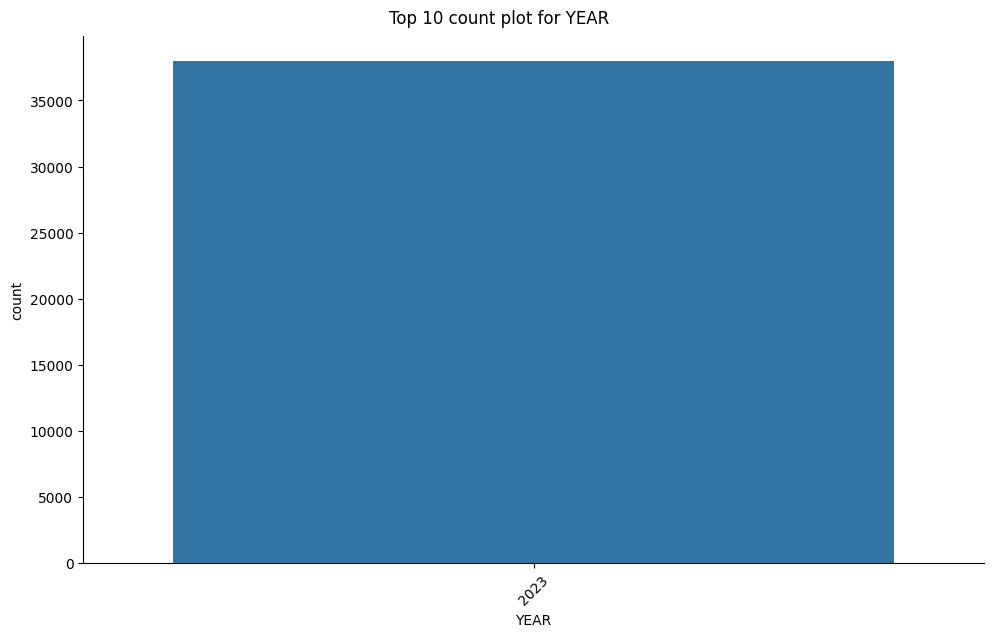

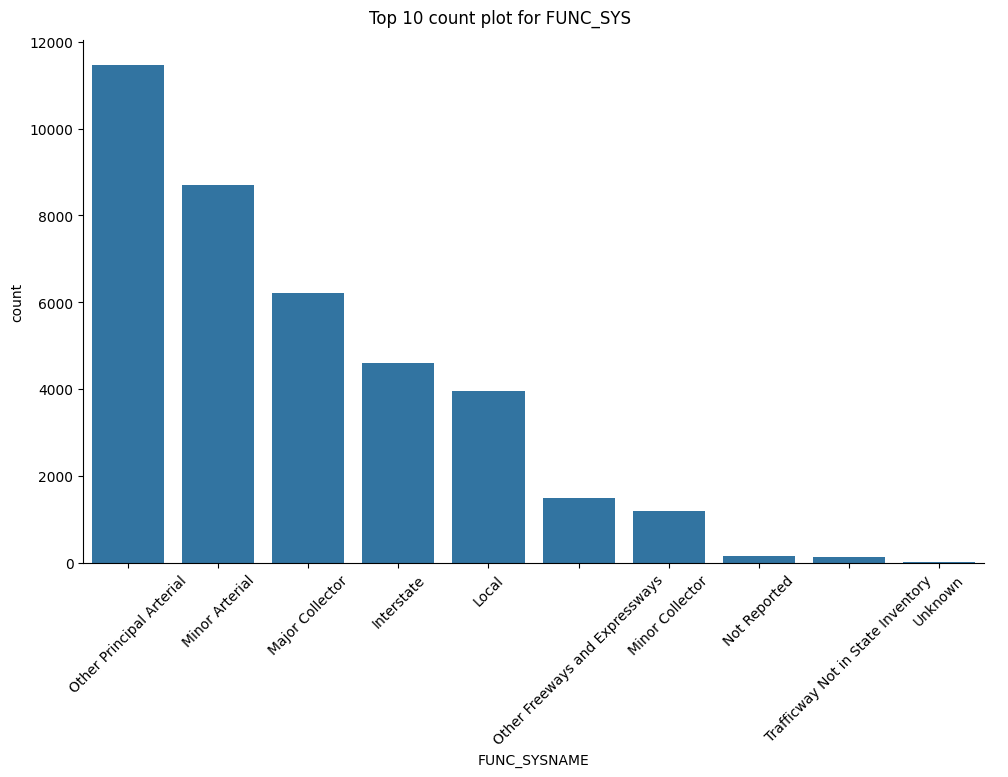

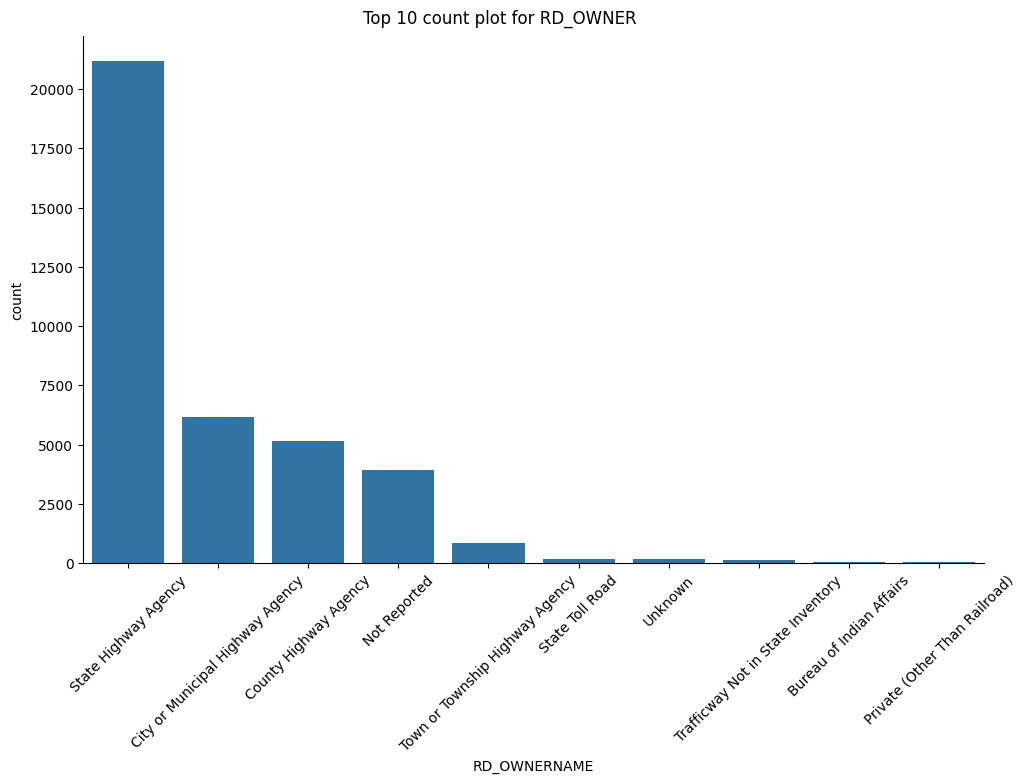

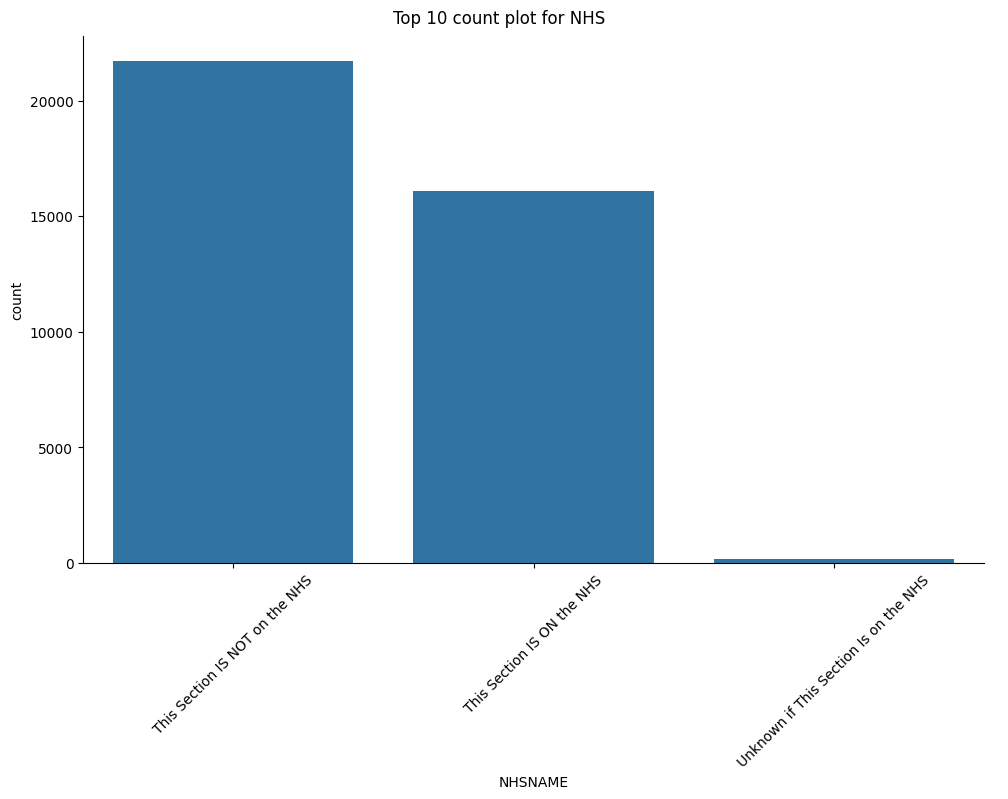

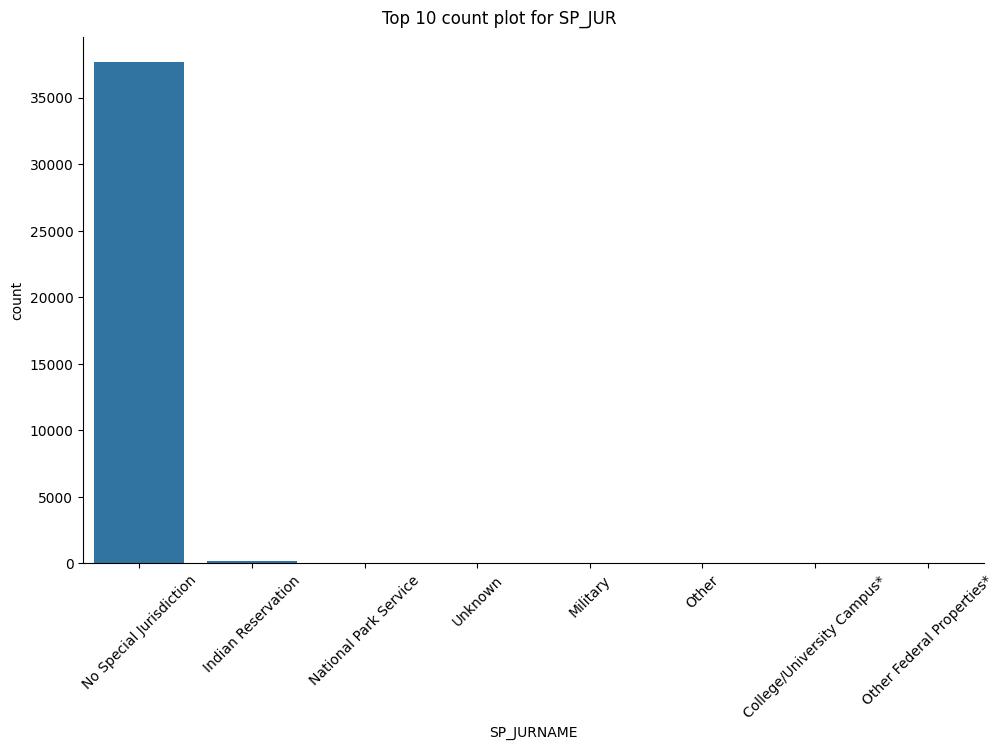

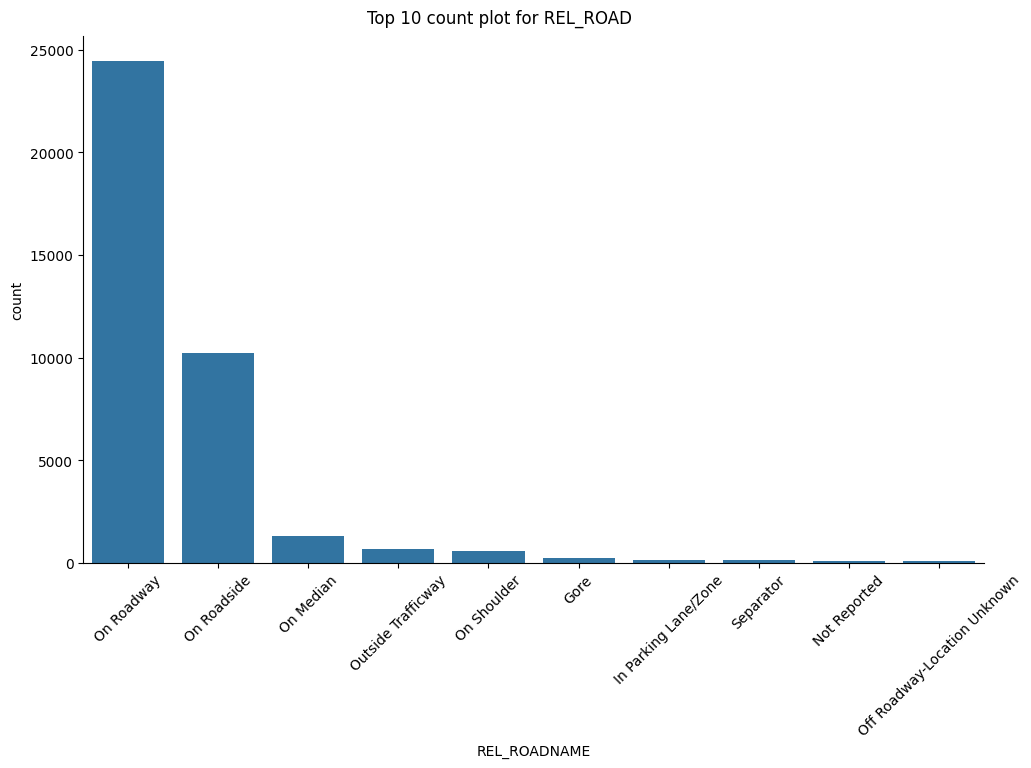

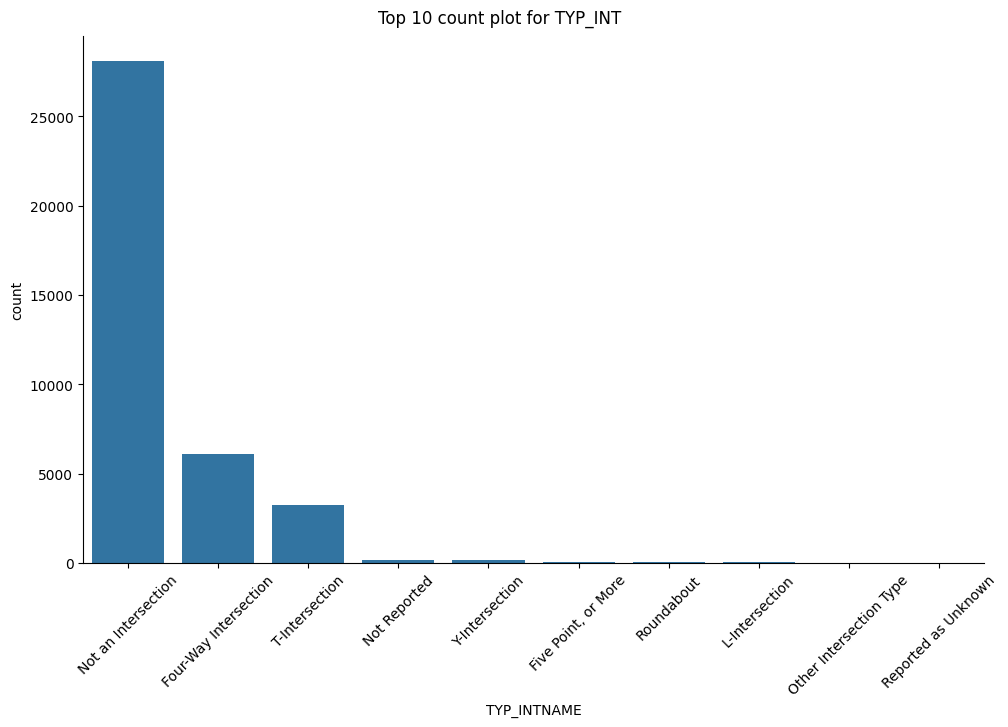

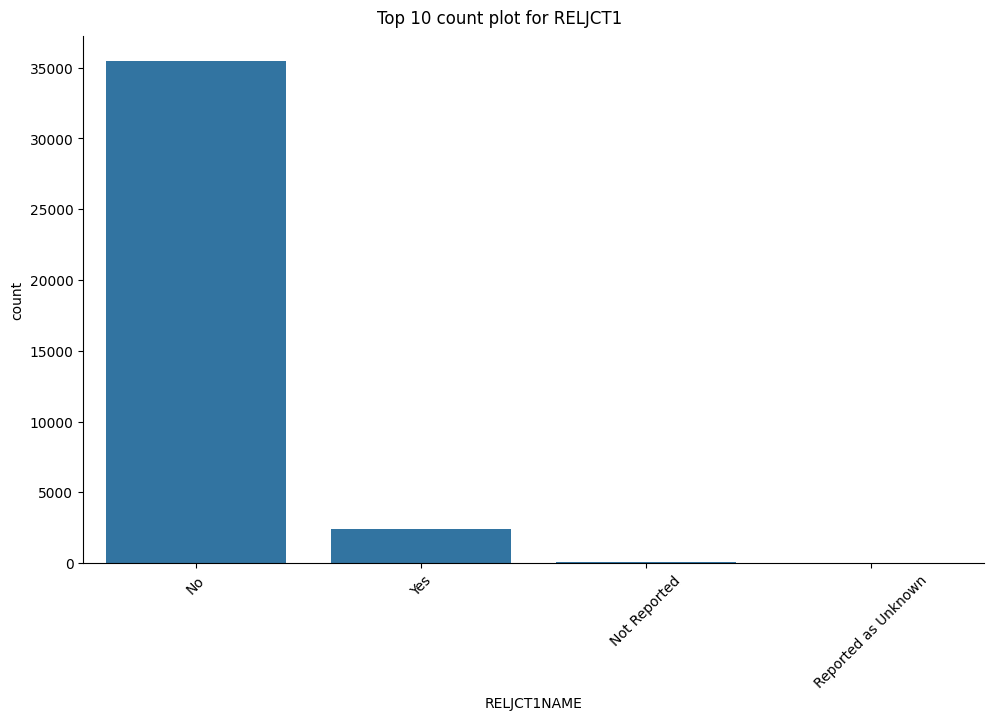

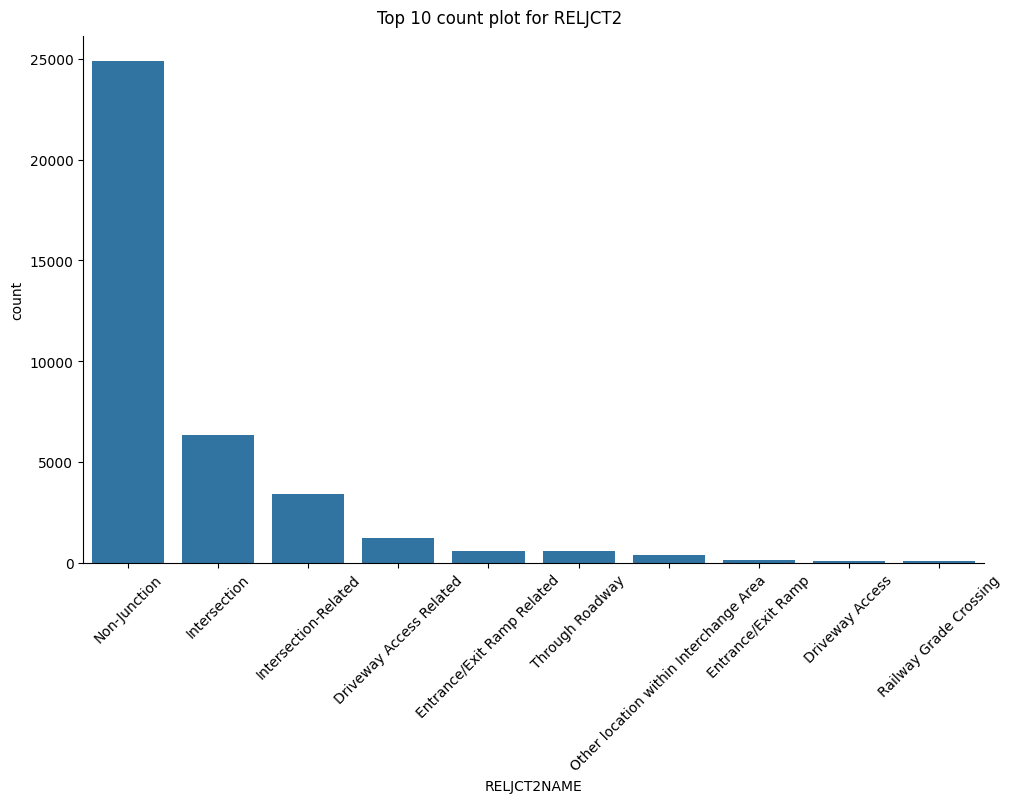

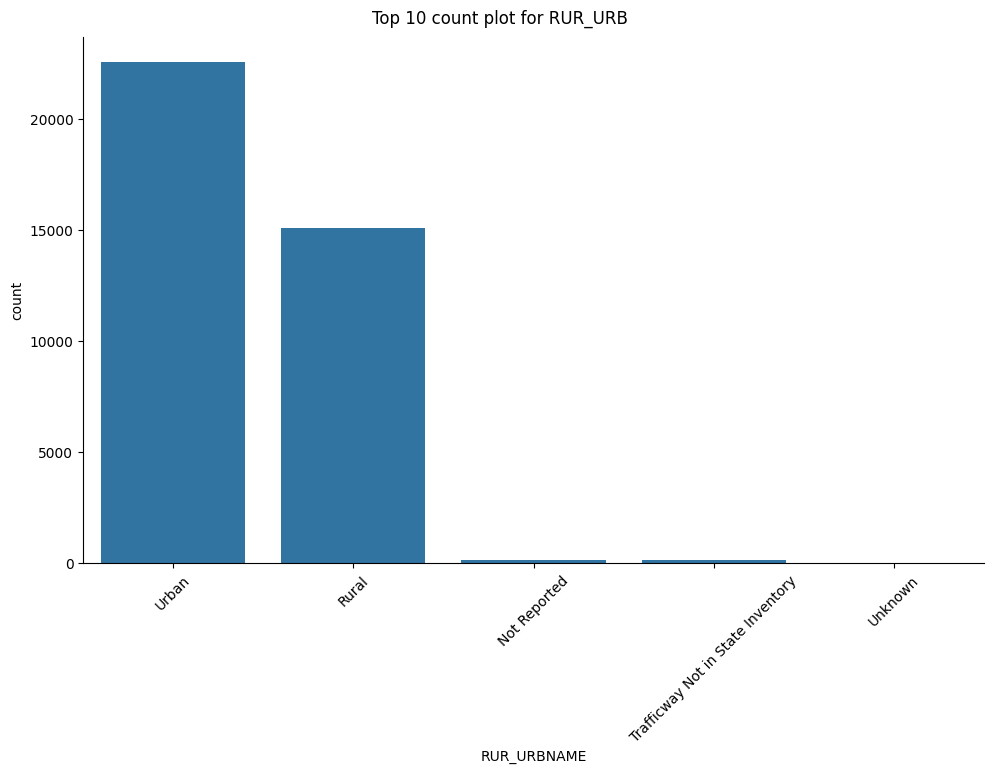

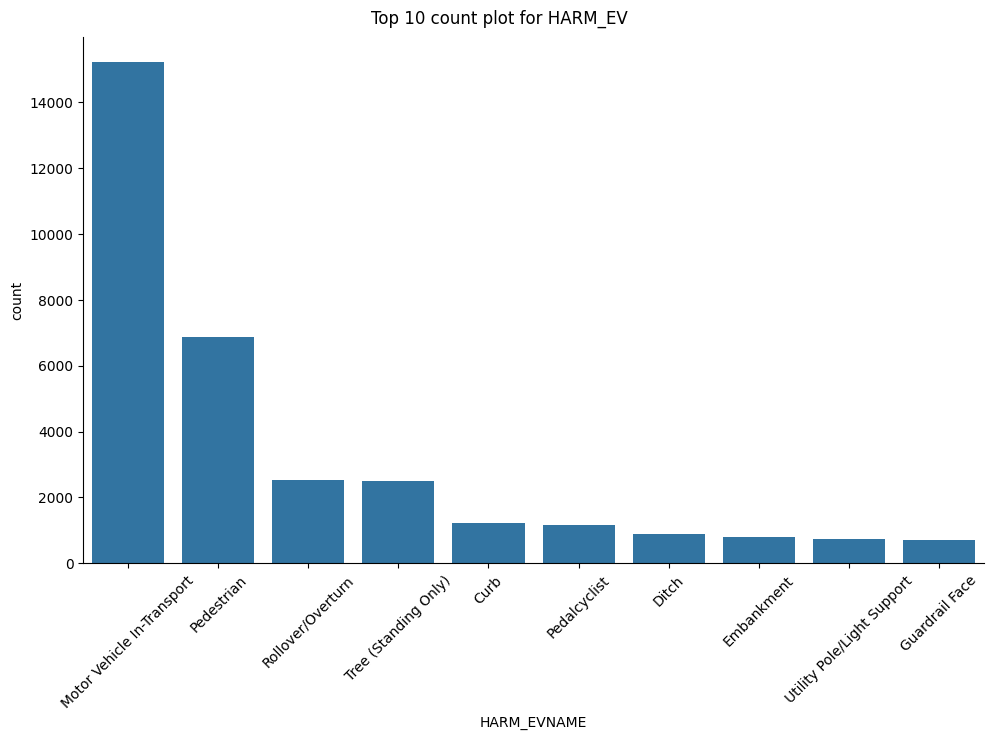

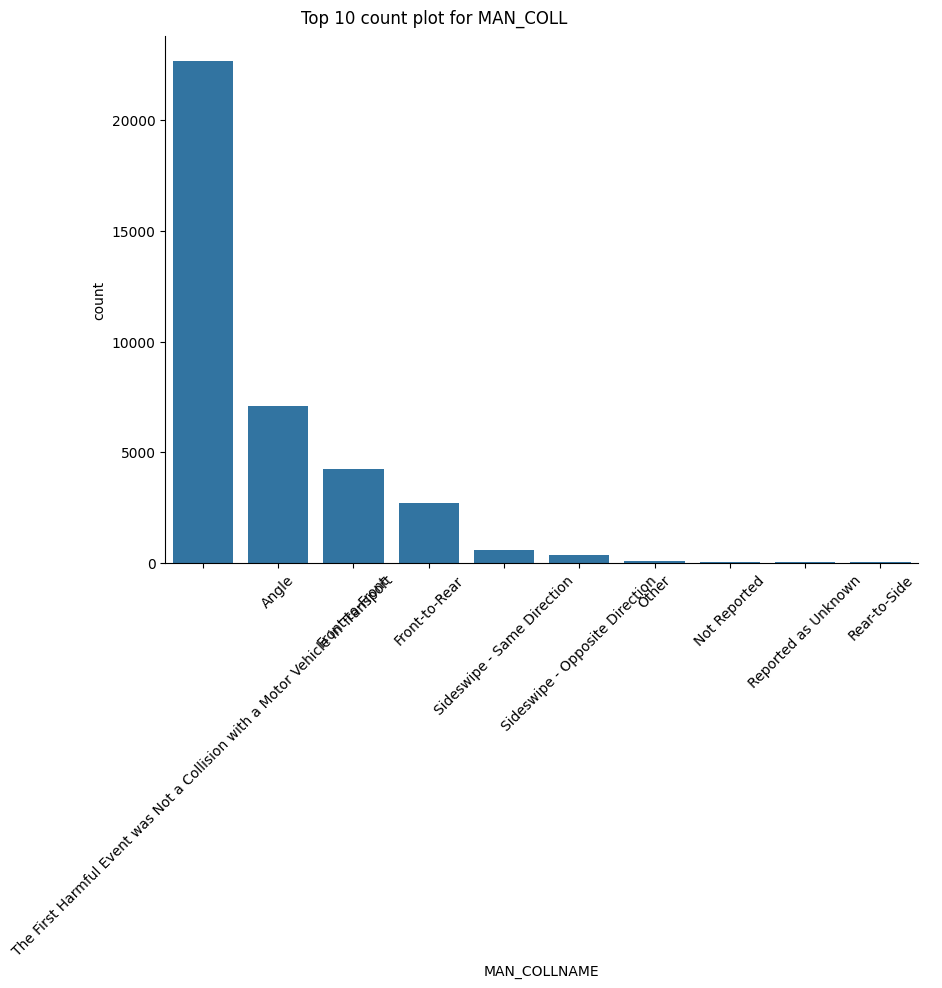

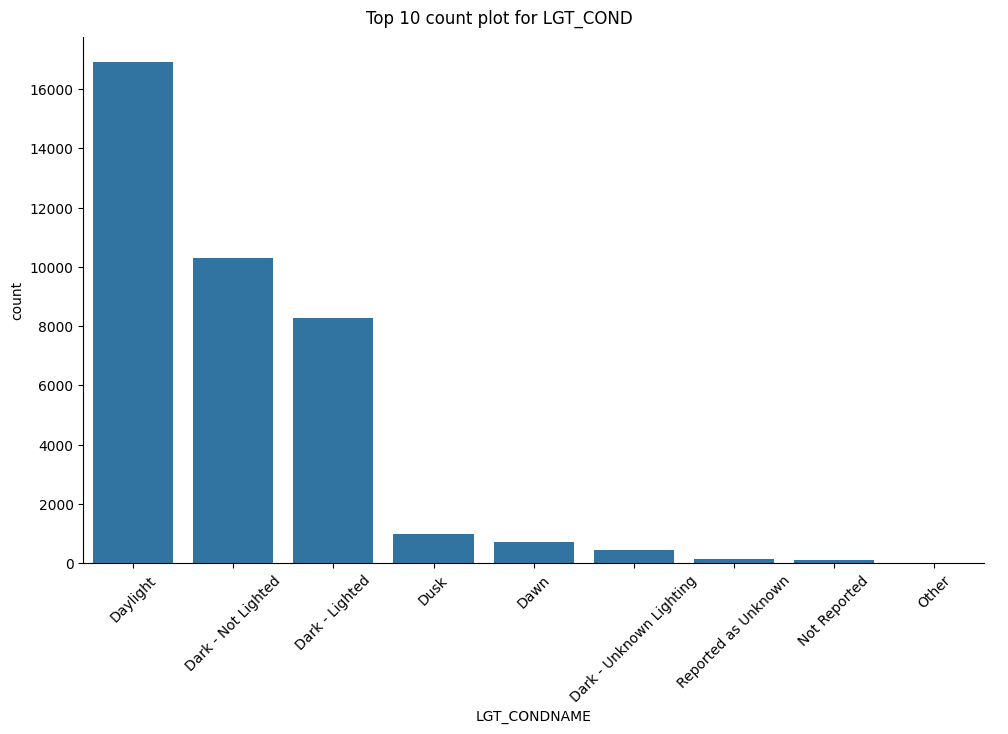

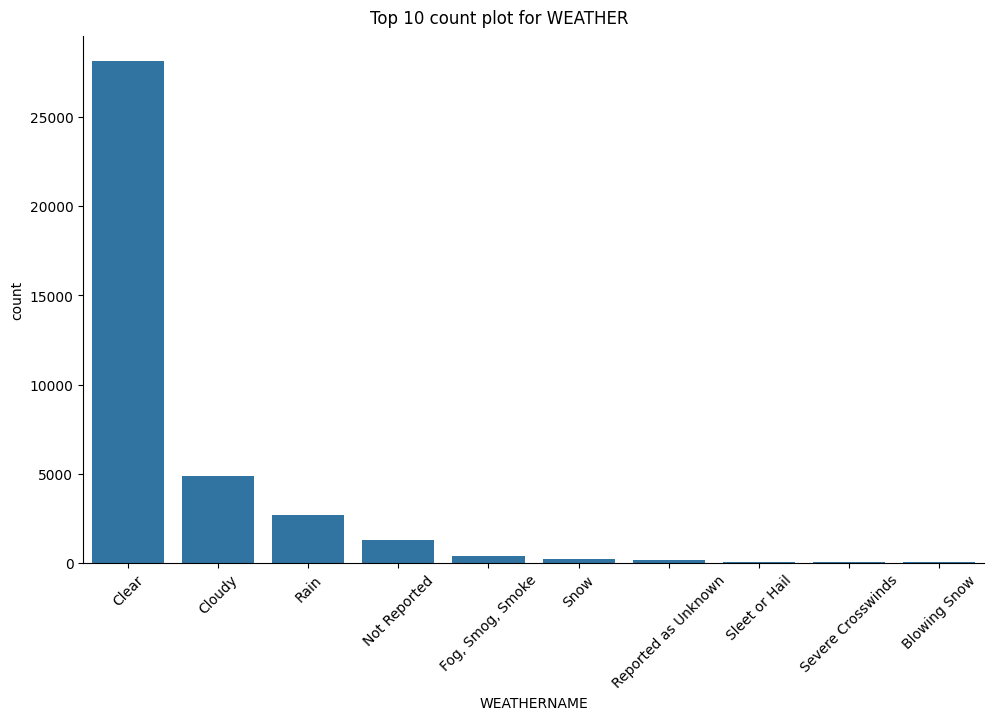

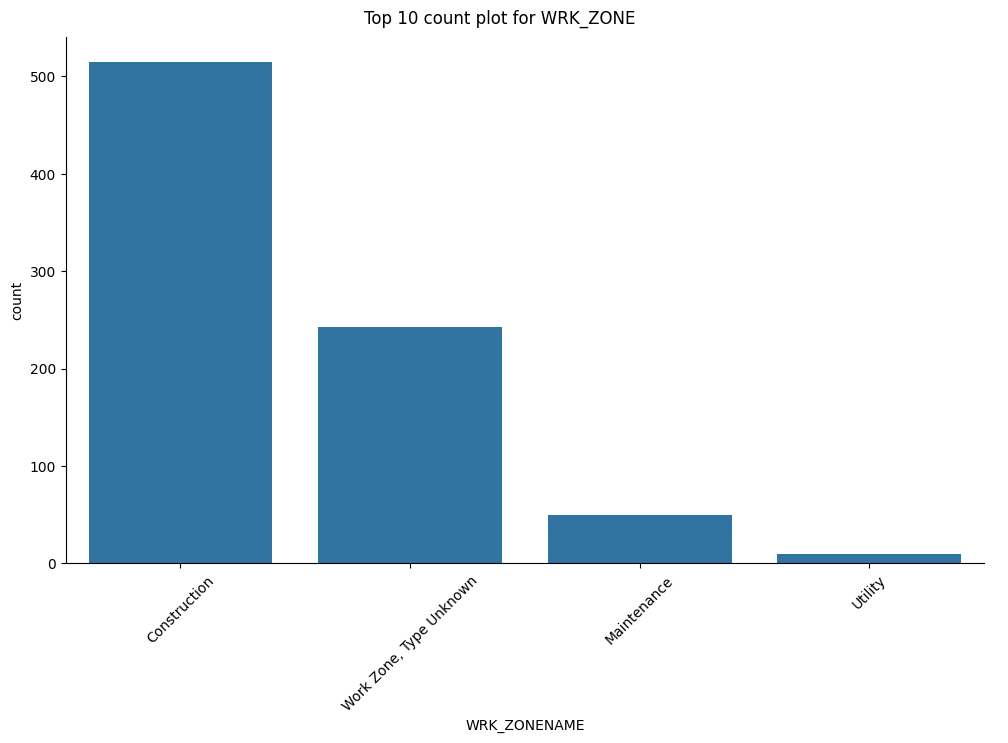

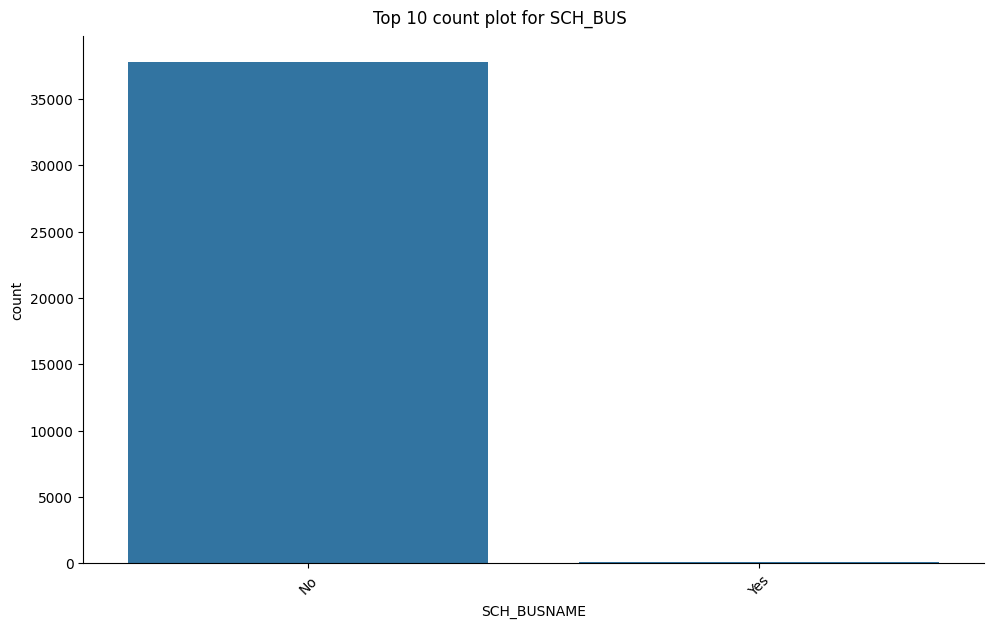

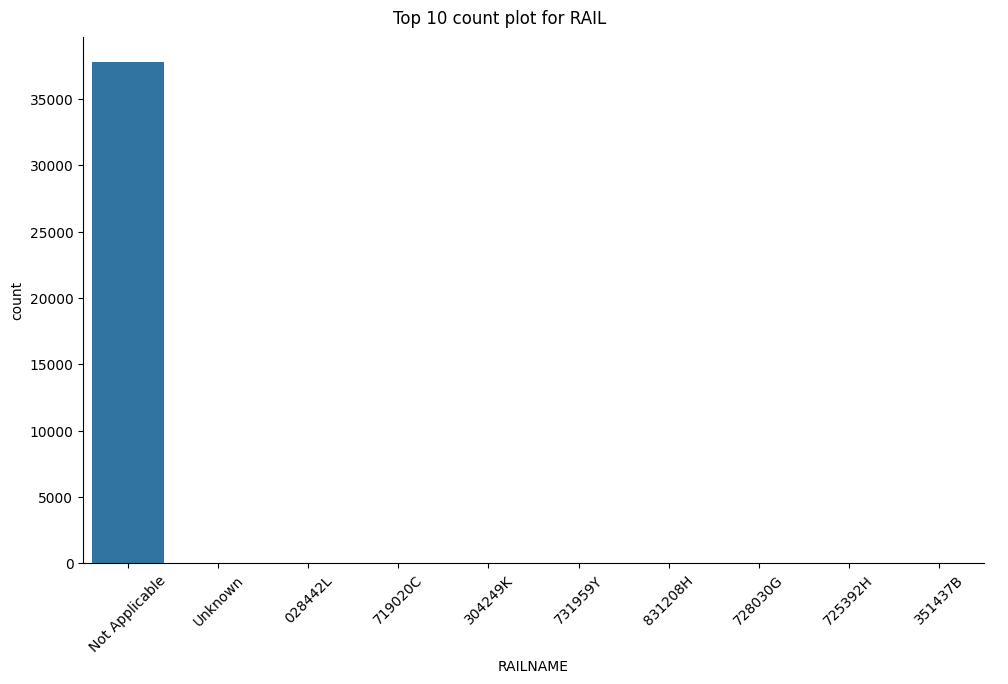

In [44]:
import seaborn as sns

for col in cat_cols:
    try:
        top10 = df[f"{col}NAME"].value_counts().index[:10]
        g = sns.catplot(x=f"{col}NAME", data=df, order=top10, kind="count", height=6, aspect=10/6)
    except KeyError:
        top10 = df[col].value_counts().index[:10]
        g = sns.catplot(x=col, data=df, order=top10, kind="count", height=6, aspect=10/6)
    g.set_xticklabels(rotation=45)
    g.fig.suptitle(f"Top 10 count plot for {col}", y=1.02)
    # In interactive environments, the figure will display automatically.

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

for col in cat_cols:
    # Determine the appropriate categorical column
    try:
        cat_col = f"{col}NAME"
        group_df = df.groupby(cat_col)['FATALS'].agg(Count='count', Avg_Fatality='median').reset_index()
    except KeyError:
        cat_col = col
        group_df = df.groupby(cat_col)['FATALS'].agg(Count='count', Avg_Fatality='median').reset_index()

    # Select top 10 categories by count
    group_df = group_df.sort_values(by='Count', ascending=False).head(10)

    # Create a dual-axis plot: bar for count and line for average fatality
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    # Bar trace for count
    fig.add_trace(go.Bar(
        x=group_df[cat_col],
        y=group_df['Count'],
        name="Count"
    ), secondary_y=False)
    
    # Line trace for average fatality 
    fig.add_trace(go.Scatter(
        x=group_df[cat_col],
        y=group_df['Avg_Fatality'],
        name="Avg Fatality",
        mode="lines+markers"
    ), secondary_y=True)
    
    # Update layout and axes titles
    fig.update_layout(
        title_text=f"Count and Average Fatality for {col}",
        xaxis_title=cat_col,
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )
    fig.update_yaxes(title_text="Count", secondary_y=False)
    fig.update_yaxes(title_text="Avg Fatality", secondary_y=True)
    
    fig.show()

C:\Users\subha\AppData\Local\Temp\ipykernel_47260\617413191.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [47]:
# Identify columns ending with 'NAME'
cols_to_exclude = [col for col in df.columns if col.endswith("NAME")]

# Drop those columns from the dataframe
df = df.drop(columns=cols_to_exclude)

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm

# Prepare modeling data (drop rows with missing fatality; you might consider other imputations)
df_model = df.dropna(subset=['FATALS'])

# Separate target and features
y = df_model['FATALS']
X = df_model.drop('FATALS', axis=1)

# One-hot encode the relevant categorical features (only for those present in X)
cat_in_X = [col for col in cat_cols if col in X.columns]
X = pd.get_dummies(X, columns=cat_in_X, drop_first=True)

# For simplicity, only keep numeric predictors
X = X.select_dtypes(include=[np.number])

# Replace inf values with NaN and drop rows with missing predictors
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#############################################
# Linear Regression using statsmodels
#############################################
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()

print(ols_model.summary())

y_pred_linear = ols_model.predict(sm.add_constant(X_test))
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression RMSE:", rmse_linear)
print("Linear Regression R2:", r2_linear)

#############################################
# Non-linear Regression using Random Forest
#############################################
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)

#############################################
# Identify top predictors for fatality
#############################################
# For the linear model, show predictors that are statistically significant (p < 0.05)
pvals = ols_model.pvalues.drop('const')
top_linear_predictors = pvals[pvals < 0.05].sort_values()
print("Top significant predictors from Linear Regression (p < 0.05):")
print(top_linear_predictors.head(10))

# For Random Forest, show the top predictors based on feature importance
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_rf_predictors = importances.sort_values(ascending=False).head(10)
print("Top predictors from Random Forest:")
print(top_rf_predictors)

                            OLS Regression Results                            
Dep. Variable:                 FATALS   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sun, 15 Jun 2025   Prob (F-statistic):               0.00
Time:                        01:26:51   Log-Likelihood:                -9772.1
No. Observations:               30360   AIC:                         1.958e+04
Df Residuals:                   30343   BIC:                         1.972e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9906      0.010     96.737      0.0

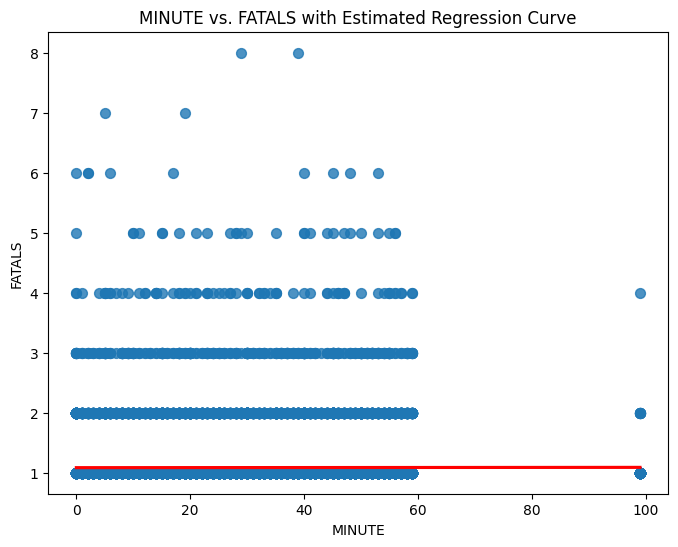

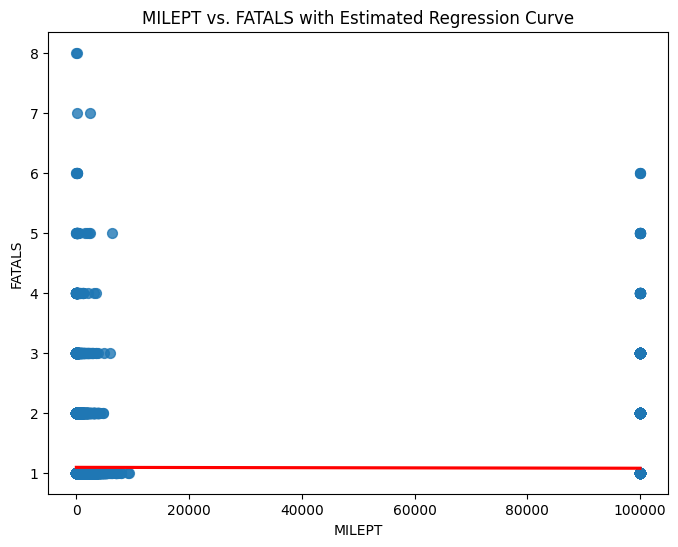

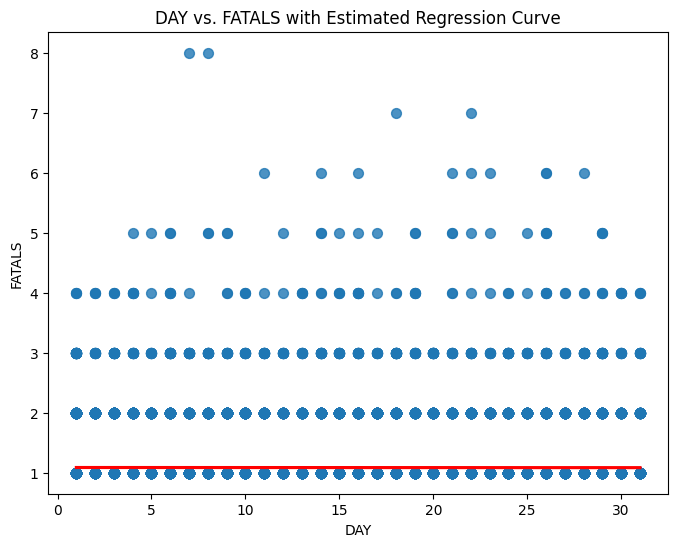

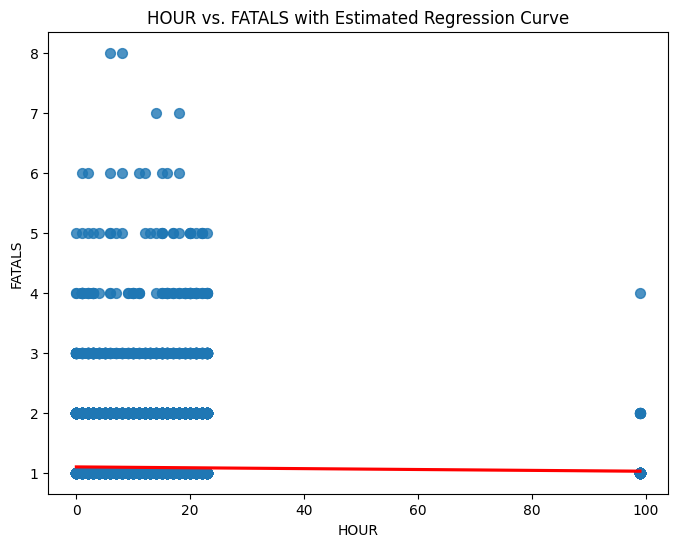

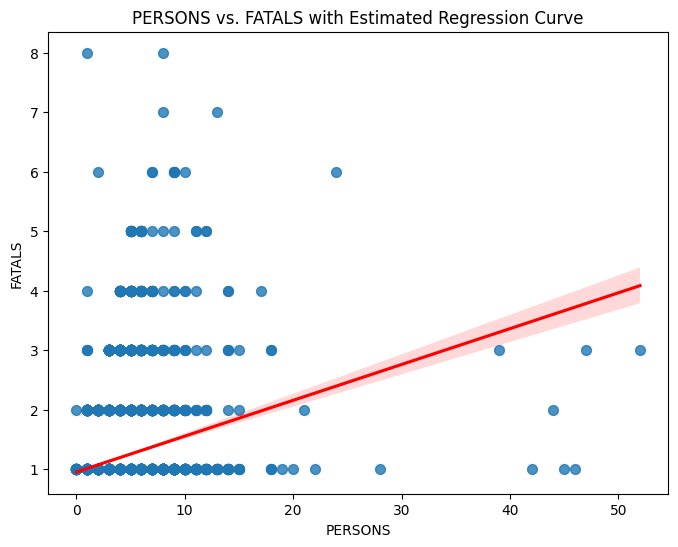

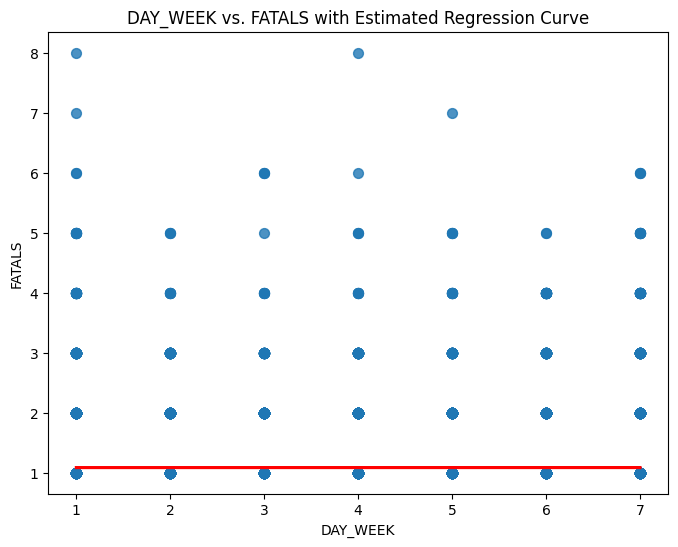

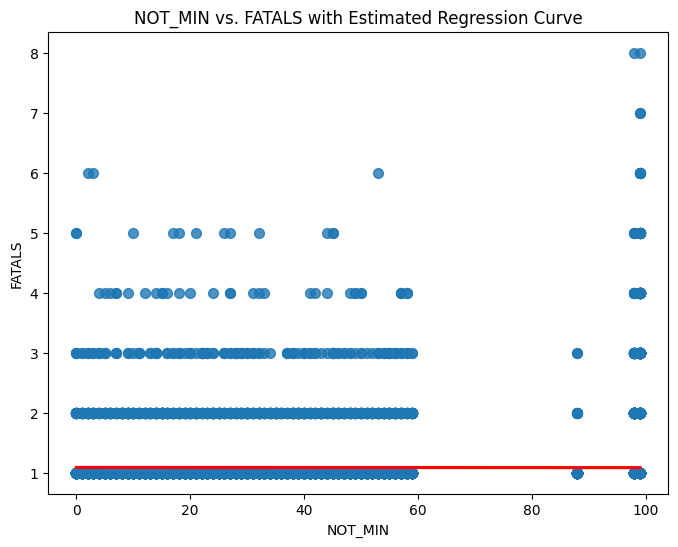

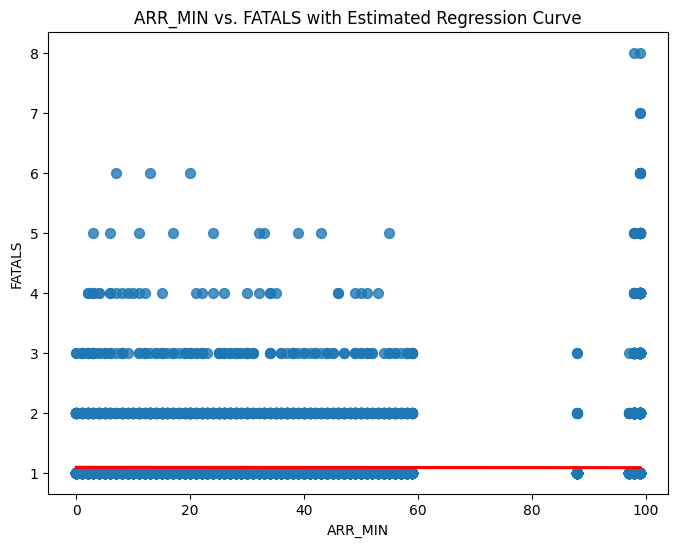

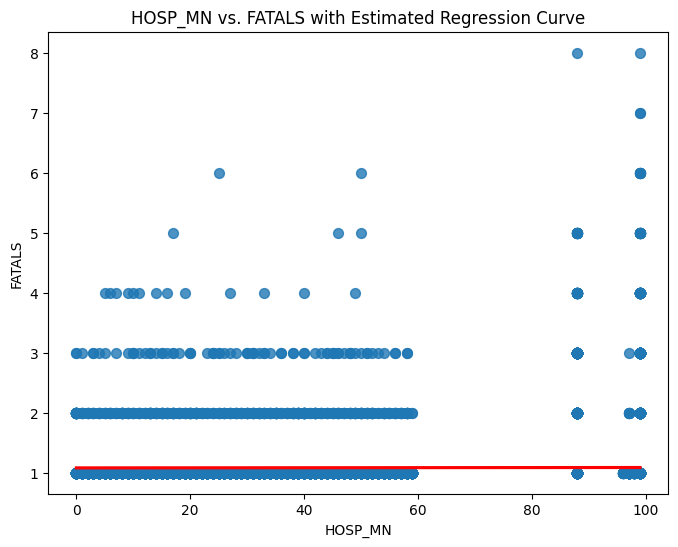

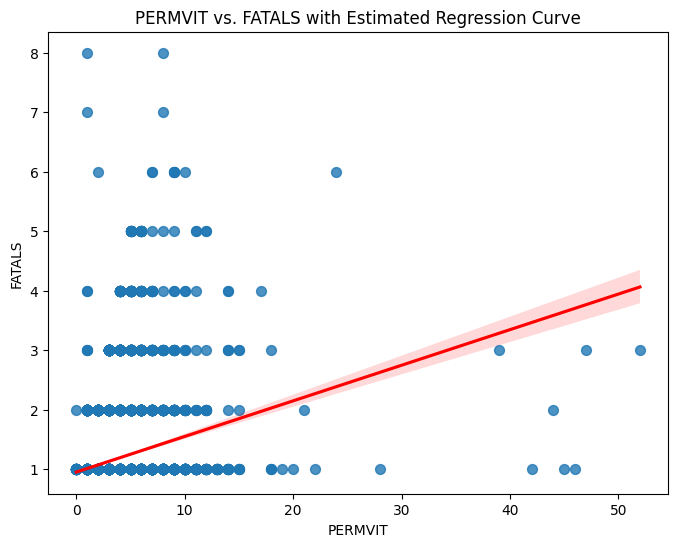

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for plotting using the processed predictors (X) and target (y)
df_plot = X.copy()
df_plot['FATALS'] = y

# Use top predictors from the Random Forest model (top_rf_predictors from previous code)
top_predictors = top_rf_predictors.index.tolist()  # top 10 predictor names

# Plot scatter plots with an estimated regression curve (using seaborn's regplot)
for predictor in top_predictors:
    plt.figure(figsize=(8, 6))
    # Use regplot to add a linear regression line over the scatter plot.
    # For a non-linear (locally weighted) smoother, you can set lowess=True.
    sns.regplot(x=predictor, y='FATALS', data=df_plot, scatter_kws={'s':50}, line_kws={'color':'red'})
    plt.title(f"{predictor} vs. FATALS with Estimated Regression Curve")
    plt.xlabel(predictor)
    plt.ylabel("FATALS")